# Data exploration

This notebook shows the data that was extracted from r/AITA subreddit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast



data = pd.read_csv('data/aita-500-top-this-week-processed.csv', index_col=0)

In [6]:
# Mostrar algunos de los datos
data.head(10)

,title,body,verdict,comments,num_comments,upvotes,upvote_ratio,url,created,edited,YTA,YWBTA,NTA,YWNBTA,ESH,NAH,INFO
1,AITA for insulting my husband for what he said...,My daughter (17f) recently started dating this...,Not the A-hole,"[""So he would rather your daughter be married ...",1482,10851,0.96,/r/AmItheAsshole/comments/1iz4o6f/aita_for_ins...,2025-02-26 20:57:36,NaN,9,0,164,0,13,2,0
2,AITA for asking a guest to not crochet at my b...,I'm (28F) getting married this year (yay!) and...,Not the A-hole,"[""So... do we maybe see why brother's GF would...",775,8102,0.97,/r/AmItheAsshole/comments/1j0isvh/aita_for_ask...,2025-02-28 16:27:01,2025-02-28 17:02:40,2,0,161,0,0,3,3
3,AITA for not comforting my bf after he didn’t ...,"Earlier in the day, I told my bf that I was go...",Not the A-hole,"[""It's not your job to help him regulate his e...",825,7539,0.96,/r/AmItheAsshole/comments/1j284st/aita_for_not...,2025-03-02 21:18:30,NaN,12,0,143,0,21,5,2
4,WIBTA if I send an email to the bday girl’s mo...,My (43F) daughter Annie 9F) was invited to a p...,Not the A-hole,"[""NTA, but: You should have asked, why there i...",645,7366,0.96,/r/AmItheAsshole/comments/1j2hp1b/wibta_if_i_s...,2025-03-03 07:36:28,2025-03-03 11:51:12,33,38,41,1,15,7,6
5,Update: AITA because I don't want my half brot...,this is an update to my [original post](https:...,UPDATE,['Definitely time for me to leave the internet...,118,7298,0.99,/r/AmItheAsshole/comments/1j12uam/update_aita_...,2025-03-01 11:07:20,NaN,1,0,2,0,0,0,0
6,AITA for demanding that my fiancé's parents ch...,My fiance and I have our wedding coming up in ...,Not the A-hole,"[""NTA. I would personally change the hotel, or...",1838,7218,0.98,/r/AmItheAsshole/comments/1iz6qer/aita_for_dem...,2025-02-26 22:44:39,2025-02-28 20:42:43,1,0,106,0,3,0,4
7,AITA for refusing to go to my sisters wedding ...,"Obligatory ""this is a throwaway account"" clari...",Not the A-hole,"[""NTA: yet one of the many reasons I dislike d...",650,6653,0.98,/r/AmItheAsshole/comments/1j0lkc4/aita_for_ref...,2025-02-28 18:31:16,2025-02-28 20:44:38,10,0,192,0,6,0,3
8,AITA for calling out my foster carer in front ...,I (17f) have lived in my current foster home f...,Not the A-hole,"[""I've never dealt with the foster care system...",135,6606,0.98,/r/AmItheAsshole/comments/1j18bye/aita_for_cal...,2025-03-01 15:01:34,NaN,0,0,65,0,0,0,13
9,AITA for telling my sister and BIL it's their ...,"Throwaway for privacy.\n\nI, 53F, have a siste...",Not the A-hole,"[""NTA. They insisted on not listening to you, ...",218,5743,0.98,/r/AmItheAsshole/comments/1j19xcb/aita_for_tel...,2025-03-01 16:12:57,2025-03-01 16:18:30,3,0,146,0,3,0,12
10,AITA for buying a treat for my oldest daughter...,My (39m) wife (40f) and I have three children ...,Not the A-hole,"[""NTA. \nI agree. They need to learn one day t...",1396,5201,0.96,/r/AmItheAsshole/comments/1j0x67k/aita_for_buy...,2025-03-01 06:08:12,NaN,52,0,133,0,0,8,5


In [7]:
# Mostrar información general de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1 to 500
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         500 non-null    object 
 1   body          500 non-null    object 
 2   verdict       423 non-null    object 
 3   comments      500 non-null    object 
 4   num_comments  500 non-null    int64  
 5   upvotes       500 non-null    int64  
 6   upvote_ratio  500 non-null    float64
 7   url           500 non-null    object 
 8   created       500 non-null    object 
 9   edited        116 non-null    object 
 10  YTA           500 non-null    int64  
 11  YWBTA         500 non-null    int64  
 12  NTA           500 non-null    int64  
 13  YWNBTA        500 non-null    int64  
 14  ESH           500 non-null    int64  
 15  NAH           500 non-null    int64  
 16  INFO          500 non-null    int64  
dtypes: float64(1), int64(9), object(7)
memory usage: 70.3+ KB


In [8]:
# Mostrar estadísticas generales de los datos
data.describe()

,num_comments,upvotes,upvote_ratio,YTA,YWBTA,NTA,YWNBTA,ESH,NAH,INFO
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,80.422000,376.834000,0.861880,3.714000,0.356000,18.864000,0.044000,0.992000,0.68600,0.998000
std,203.134328,1202.670183,0.151209,15.053685,4.004164,35.418617,0.249376,2.543398,1.94086,1.916597
min,2.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,4.750000,2.000000,0.770000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000
50%,12.000000,6.500000,0.920000,0.000000,0.000000,5.000000,0.000000,0.000000,0.00000,0.000000
75%,59.250000,84.750000,1.000000,2.000000,0.000000,19.000000,0.000000,1.000000,1.00000,1.000000
max,1838.000000,10851.000000,1.000000,162.000000,79.000000,242.000000,3.000000,27.000000,24.00000,16.000000


In [35]:
# Mostrar un post y sus comentarios
print(f"Title: {data.loc[1, 'title']} \t {data.loc[1, 'url']}" )
print("_"*80)
print("\nBody:\n")
print(data.loc[1, 'body'].replace('\n', '.'))
print("_"*80)
print("\nVerdict:", data.loc[1, 'verdict'])
print("_"*80)
print("\nUpvotes:", data.loc[1, 'upvotes'])
print("_"*80)
print(f"\nCounts:\t NTA: {data.loc[1, 'NTA']}\t YTA: {data.loc[1, 'YTA']}\t ESH: {data.loc[1, 'ESH']}\t NAH: {data.loc[1, 'NAH']}")
print("_"*80)
comments = data.loc[1, 'comments']
comments_list = ast.literal_eval(comments)
print("\nComments:")
for i, comment in enumerate(comments_list):
    print(f"\nComment {i+1}:")
    print(comment.replace('\n', '.'))
    print("\n#######")



Title: AITA for insulting my husband for what he said about our daughter’s bf? 	 /r/AmItheAsshole/comments/1iz4o6f/aita_for_insulting_my_husband_for_what_he_said/
________________________________________________________________________________

Body:

My daughter (17f) recently started dating this boy 17m. He is her first bf ever. One of my biggest concerns when my daughter started dating is her getting mistreated, an obvious concern. However, after meeting her bf at one of his baseball games (she met him trough one of her friends in baseball) I realized this was not something I had to be seriously concerned about. ..He is genuinely one of the sweetest people I have ever met. Every time I see him interact with the coaches, his teammates, his opponents, my daughter, etc. it is always positive. He is just generally a very soft-spoken and kind individual, always positive and happy. I also say this with no ill intent, but he is fairly short and somewhat tubby, which is relevant to my husba

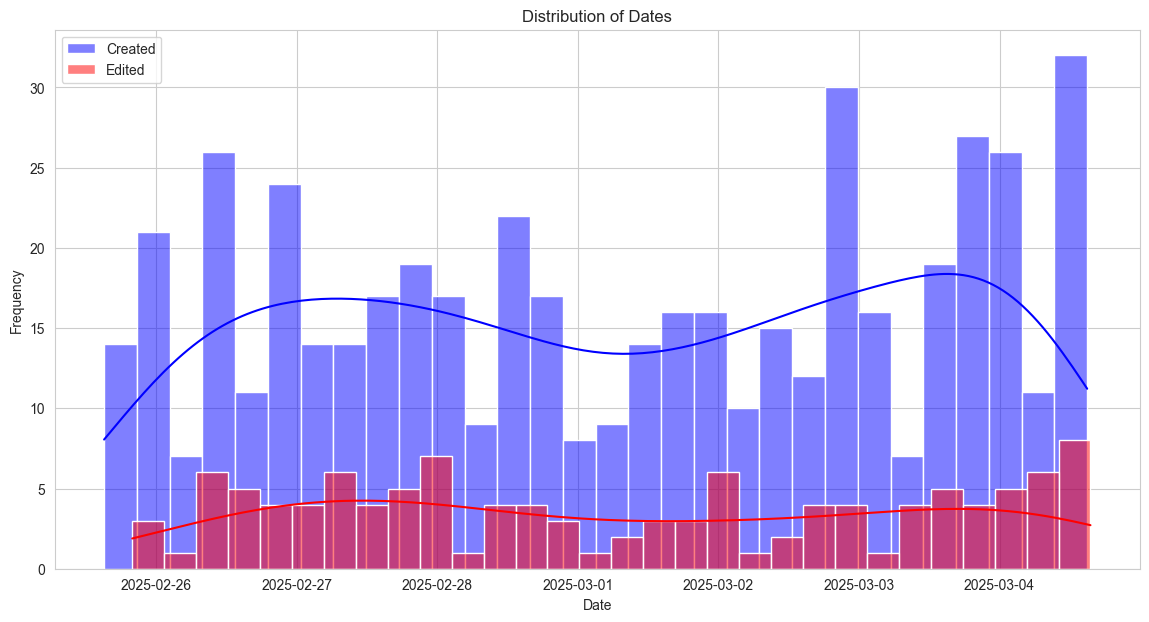

In [58]:
# Plot the distribution of created dates
plt.figure(figsize=(14, 7))
sns.histplot(data['created'], bins=30, kde=True, color='blue', label='Created')
sns.histplot(data['edited'].dropna(), bins=30, kde=True, color='red', label='Edited')
plt.legend()
plt.title('Distribution of Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()



/var/folders/05/h_xl6mtd7h1dhnqt5jbnbycc0000gn/T/ipykernel_21473/4035308788.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['verdict'], order = data['verdict'].value_counts().index, palette='viridis', ax=ax[2])


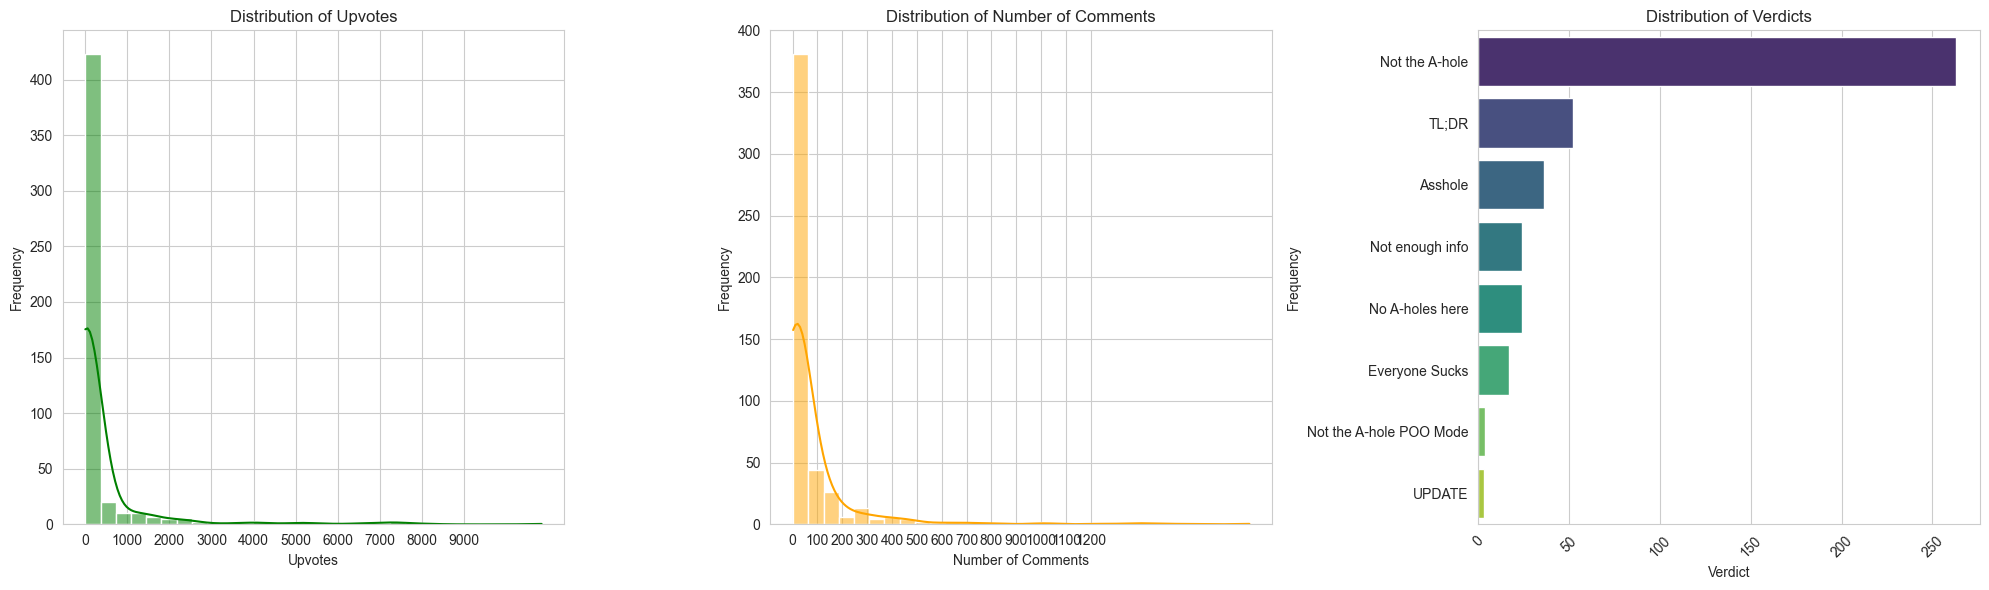

In [71]:
# plot distributions for upvotes, number of comments, verdict
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.histplot(data['upvotes'], bins=30, kde=True, color='green', ax=ax[0])
ax[0].set_xticks(np.arange(0, 10000, 1000))
ax[0].set_title('Distribution of Upvotes')
ax[0].set_xlabel('Upvotes')
ax[0].set_ylabel('Frequency')

sns.histplot(data['num_comments'], bins=30, kde=True, color='orange', ax=ax[1])
ax[1].set_xticks(np.arange(0, 1300, 100))
ax[1].set_title('Distribution of Number of Comments')
ax[1].set_xlabel('Number of Comments')
ax[1].set_ylabel('Frequency')

sns.countplot(data['verdict'], order = data['verdict'].value_counts().index, palette='viridis', ax=ax[2])
ax[2].set_title('Distribution of Verdicts')
ax[2].set_xlabel('Verdict')
ax[2].set_ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()